In [ ]:
https://colab.research.google.com/drive/1psrg-mMhqYzV28Np0OdO84K0QJgUj47I?authuser=2

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!ls gdrive/MyDrive

 10.1109@SBESC49506.2019.9046088.pdf
 16102715.pdf
'1681150518787_CONTRATO_DE_LOCACAO_CASA_LARANJAL_FINALIZADO_29_assinado_assinado_assinado (1)-Man.pdf'
'Colab Notebooks'
'Cópia de Template - Distinguindo Frutas.gsheet'
 Fotos2
 Graduação
 Mestrado
 olist_order_reviews_dataset.csv
 Valter.pdf


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, TextVectorization, Dropout, Attention
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2

In [4]:
df = pd.read_csv('gdrive/MyDrive/olist_order_reviews_dataset.csv', usecols=['review_comment_message', 'review_score'])
df.head()

,review_score,review_comment_message
0,4,NaN
1,5,NaN
2,5,NaN
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...


In [5]:
df = df.dropna().reset_index(drop=True)
df.head()

,review_score,review_comment_message
0,5,Recebi bem antes do prazo estipulado.
1,5,Parabéns lojas lannister adorei comprar pela I...
2,4,aparelho eficiente. no site a marca do aparelh...
3,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
4,5,"Vendedor confiável, produto ok e entrega antes..."


In [6]:
# Pré-processamento dos dados
X = df['review_comment_message'].astype(str)
y = df['review_score']

In [7]:
# Convertendo rótulos para valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [8]:
# Dividindo o conjunto de dados em treino e teste/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
def plot_history(history):
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.legend(['train', 'validation'])
  plt.title('Train loss vs Val loss')

  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.legend(['train', 'validation'])
  plt.title('Train Acc vs Val Acc')

  plt.show()

In [10]:
# Tokenização e sequenciamento
max_words = 6000  # Número máximo de palavras no vocabulário
max_len = 50  # Número máximo de palavras em uma sequência

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

In [11]:
#um modelo simples de lstm
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(5, activation='softmax'))  # 5 classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/10
1025/1025 [==============================] - 49s 45ms/step - loss: 0.9098 - accuracy: 0.6708 - val_loss: 0.8510 - val_accuracy: 0.6859
Epoch 2/10
1025/1025 [==============================] - 40s 39ms/step - loss: 0.7907 - accuracy: 0.7114 - val_loss: 0.8483 - val_accuracy: 0.6869
Epoch 3/10
1025/1025 [==============================] - 43s 42ms/step - loss: 0.7451 - accuracy: 0.7254 - val_loss: 0.8773 - val_accuracy: 0.6781
Epoch 4/10
1025/1025 [==============================] - 40s 39ms/step - loss: 0.7069 - accuracy: 0.7399 - val_loss: 0.8797 - val_accuracy: 0.6767
Epoch 5/10
1025/1025 [==============================] - 39s 38ms/step - loss: 0.6604 - accuracy: 0.7597 - val_loss: 0.9215 - val_accuracy: 0.6774
Epoch 6/10
1025/1025 [==============================] - 44s 43ms/step - loss: 0.6142 - accuracy: 0.7813 - val_loss: 0.9592 - val_accuracy: 0.6715
Epoch 7/10
1025/1025 [==============================] - 51s 49ms/step - loss: 0.5714 - accuracy: 0.7970 - val_loss: 1.0266 -

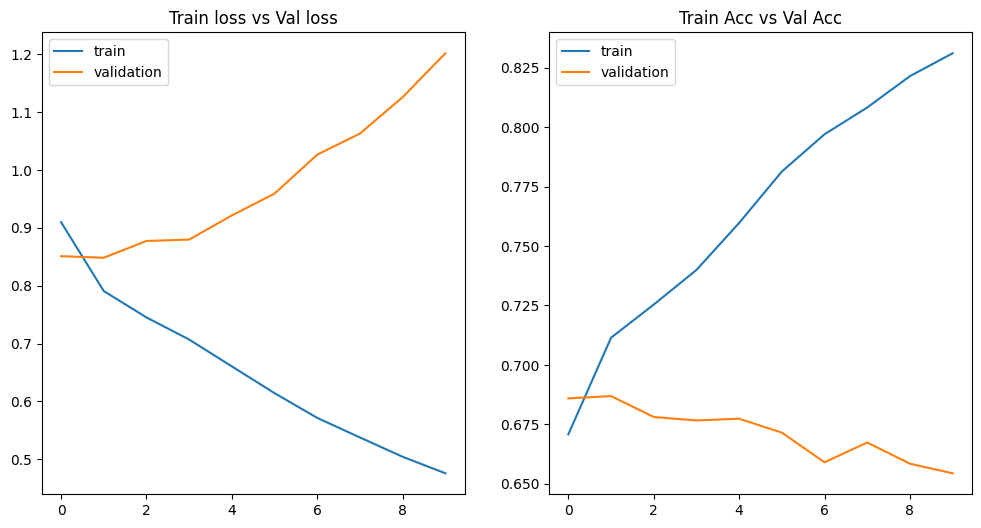

In [12]:
plot_history(history)

Modelo simples está overfittando, adicionar dropout e regularização

In [13]:
#um modelo simples de lstm
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(64, dropout=0.5,kernel_regularizer=l2(1e-4)))
model.add(Dense(5, activation='softmax'))  # 5 classes para classificação multiclasse

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_val_pad, y_val))

Epoch 1/10
513/513 [==============================] - 31s 56ms/step - loss: 0.9859 - accuracy: 0.6462 - val_loss: 0.8915 - val_accuracy: 0.6769
Epoch 2/10
513/513 [==============================] - 27s 52ms/step - loss: 0.8453 - accuracy: 0.6971 - val_loss: 0.8587 - val_accuracy: 0.6911
Epoch 3/10
513/513 [==============================] - 29s 56ms/step - loss: 0.8083 - accuracy: 0.7066 - val_loss: 0.8607 - val_accuracy: 0.6884
Epoch 4/10
513/513 [==============================] - 27s 53ms/step - loss: 0.7878 - accuracy: 0.7143 - val_loss: 0.8643 - val_accuracy: 0.6903
Epoch 5/10
513/513 [==============================] - 28s 54ms/step - loss: 0.7700 - accuracy: 0.7198 - val_loss: 0.8659 - val_accuracy: 0.6895
Epoch 6/10
513/513 [==============================] - 29s 56ms/step - loss: 0.7578 - accuracy: 0.7246 - val_loss: 0.8697 - val_accuracy: 0.6872
Epoch 7/10
513/513 [==============================] - 26s 51ms/step - loss: 0.7445 - accuracy: 0.7302 - val_loss: 0.8725 - val_accuracy:

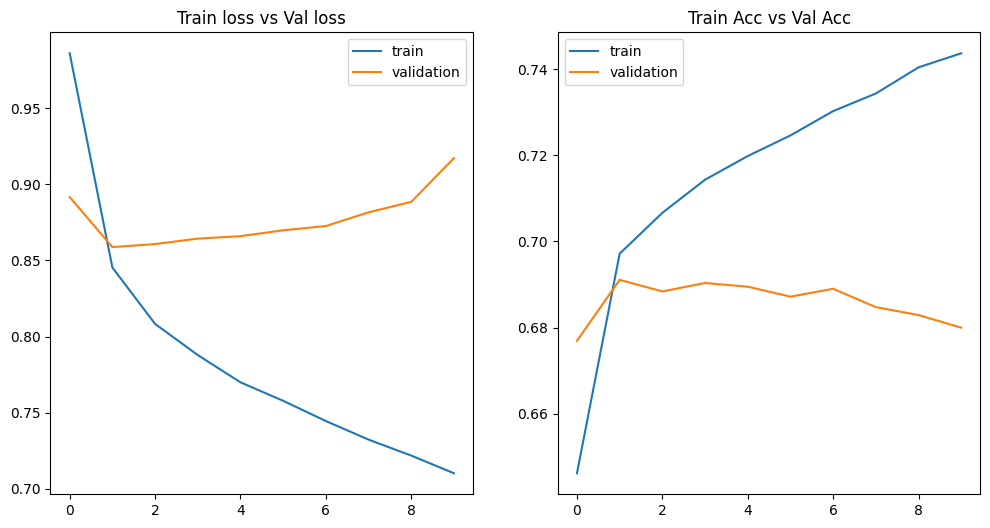

In [14]:
plot_history(history)

Overfitting melhorou nas primeiras épocas, learning rate pode ser ajustada conforme o treinamento

In [12]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 3:
        lr *= 1e-1
    return lr

# learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

In [16]:
#um modelo simples de lstm
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(64, dropout=0.5, kernel_regularizer=l2(1e-4)))
model.add(Dense(5, activation='softmax'))  # 5 classes para classificação multiclasse

# especificando a learning rate do otimizador Adam
model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Trainando o modelo com o callback de learning rate scheduler
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val), callbacks=[lr_scheduler])

Epoch 1/10
1025/1025 [==============================] - 54s 49ms/step - loss: 0.9566 - accuracy: 0.6600 - val_loss: 0.8726 - val_accuracy: 0.6828 - lr: 0.0010
Epoch 2/10
1025/1025 [==============================] - 43s 42ms/step - loss: 0.8387 - accuracy: 0.6984 - val_loss: 0.8602 - val_accuracy: 0.6870 - lr: 0.0010
Epoch 3/10
1025/1025 [==============================] - 47s 46ms/step - loss: 0.8046 - accuracy: 0.7089 - val_loss: 0.8697 - val_accuracy: 0.6891 - lr: 0.0010
Epoch 4/10
1025/1025 [==============================] - 43s 41ms/step - loss: 0.7862 - accuracy: 0.7164 - val_loss: 0.8576 - val_accuracy: 0.6935 - lr: 0.0010
Epoch 5/10
1025/1025 [==============================] - 46s 45ms/step - loss: 0.7497 - accuracy: 0.7277 - val_loss: 0.8571 - val_accuracy: 0.6902 - lr: 1.0000e-04
Epoch 6/10
1025/1025 [==============================] - 50s 49ms/step - loss: 0.7437 - accuracy: 0.7315 - val_loss: 0.8647 - val_accuracy: 0.6916 - lr: 1.0000e-04
Epoch 7/10
1025/1025 [================

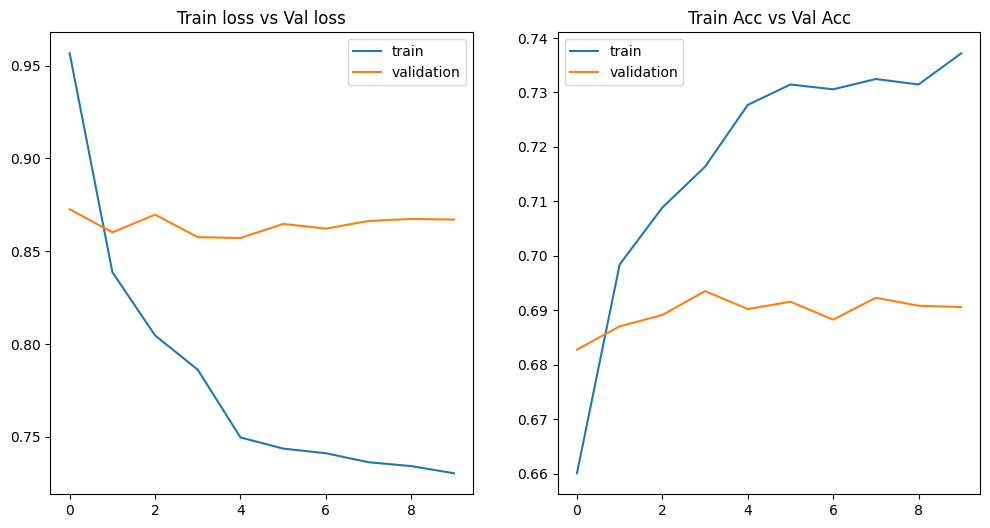

In [17]:
plot_history(history)

Overfitting estabilizado, adicionando complexidade

In [19]:
#adicionando complexidade e treinando com mais épocas
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(64, dropout=0.3, kernel_regularizer=l2(1e-4), return_sequences=True))
model.add(LSTM(32, dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val), callbacks=[lr_scheduler])

Epoch 1/10
1025/1025 [==============================] - 80s 74ms/step - loss: 1.0037 - accuracy: 0.6539 - val_loss: 0.8863 - val_accuracy: 0.6784 - lr: 0.0010
Epoch 2/10
1025/1025 [==============================] - 74s 73ms/step - loss: 0.8651 - accuracy: 0.6948 - val_loss: 0.8690 - val_accuracy: 0.6861 - lr: 0.0010
Epoch 3/10
1025/1025 [==============================] - 74s 72ms/step - loss: 0.8296 - accuracy: 0.7052 - val_loss: 0.8609 - val_accuracy: 0.6873 - lr: 0.0010
Epoch 4/10
1025/1025 [==============================] - 73s 71ms/step - loss: 0.8030 - accuracy: 0.7116 - val_loss: 0.8675 - val_accuracy: 0.6873 - lr: 0.0010
Epoch 5/10
1025/1025 [==============================] - 74s 72ms/step - loss: 0.7660 - accuracy: 0.7235 - val_loss: 0.8694 - val_accuracy: 0.6873 - lr: 1.0000e-04
Epoch 6/10
1025/1025 [==============================] - 72s 70ms/step - loss: 0.7591 - accuracy: 0.7264 - val_loss: 0.8754 - val_accuracy: 0.6917 - lr: 1.0000e-04
Epoch 7/10
1025/1025 [================

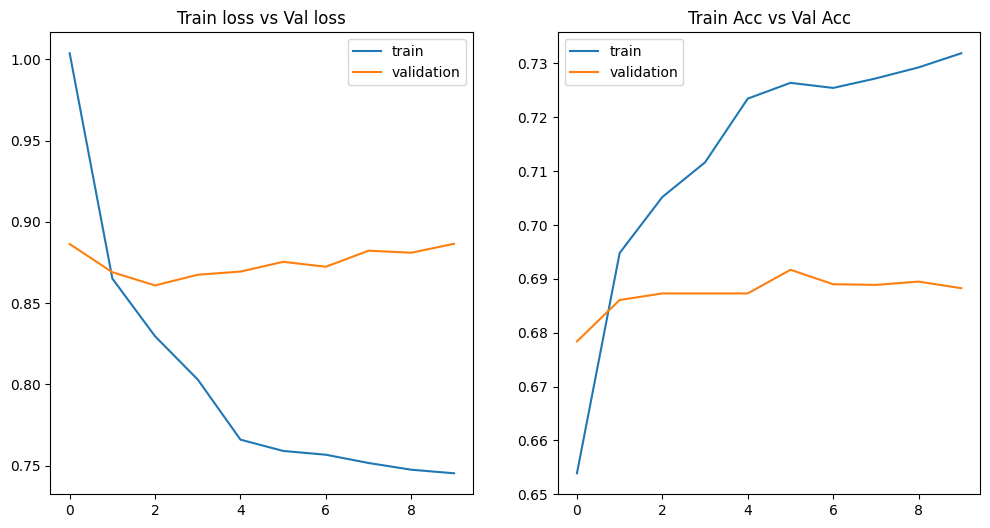

In [20]:
plot_history(history)

In [13]:
#adicionando complexidade e treinando com mais épocas
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(128, dropout=0.3, kernel_regularizer=l2(1e-4), return_sequences=True))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val), callbacks=[lr_scheduler])

Epoch 1/10
1025/1025 [==============================] - 237s 226ms/step - loss: 0.9920 - accuracy: 0.6595 - val_loss: 0.8726 - val_accuracy: 0.6836 - lr: 0.0010
Epoch 2/10
 168/1025 [===>..........................] - ETA: 3:37 - loss: 0.8496 - accuracy: 0.6981

KeyboardInterrupt: ignored

In [24]:
units=128
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=units, input_length=max_len, mask_zero=True))
model.add(Dropout(rate=0.5))
model.add(LSTM(units, dropout=0.2, return_sequences=True))
model.add(Dropout(rate=0.5))
model.add(LSTM(units, dropout=0.1, return_sequences=True))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation='softmax'))


rms = RMSprop(learning_rate=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

history = model.fit(X_train_pad, y_train, epochs=10, batch_size=128, validation_data=(X_val_pad, y_val), callbacks=[lr_scheduler])

Epoch 1/10


InvalidArgumentError: ignored

In [140]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(32, dropout=0.5,  kernel_regularizer=l2(1e-4)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(1e-4)))  # Adjust the number of units as needed
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Modify model compilation to use the Adam optimizer with a specified learning rate
model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with the learning rate scheduler callback
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val), callbacks=[lr_scheduler])

Epoch 1/10
1025/1025 [==============================] - 29s 25ms/step - loss: 1.0504 - accuracy: 0.6417 - val_loss: 0.9018 - val_accuracy: 0.6707 - lr: 0.0010
Epoch 2/10
1025/1025 [==============================] - 11s 11ms/step - loss: 0.8959 - accuracy: 0.6865 - val_loss: 0.8747 - val_accuracy: 0.6796 - lr: 0.0010
Epoch 3/10
1025/1025 [==============================] - 9s 9ms/step - loss: 0.8589 - accuracy: 0.6957 - val_loss: 0.8666 - val_accuracy: 0.6820 - lr: 0.0010
Epoch 4/10
1025/1025 [==============================] - 12s 12ms/step - loss: 0.8265 - accuracy: 0.7031 - val_loss: 0.8647 - val_accuracy: 0.6847 - lr: 1.0000e-04
Epoch 5/10
1025/1025 [==============================] - 10s 10ms/step - loss: 0.8166 - accuracy: 0.7032 - val_loss: 0.8686 - val_accuracy: 0.6855 - lr: 1.0000e-04
Epoch 6/10
1025/1025 [==============================] - 8s 8ms/step - loss: 0.8122 - accuracy: 0.7043 - val_loss: 0.8690 - val_accuracy: 0.6857 - lr: 1.0000e-04
Epoch 7/10
1025/1025 [================

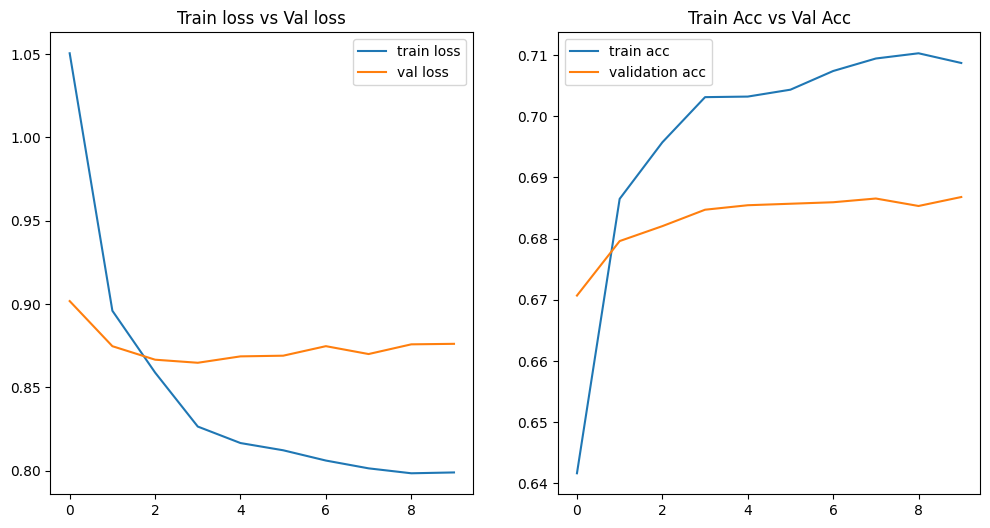

In [141]:
plot_history(history)

Acabaram recursos Free, não consegui avançar na acurácia